# Análise de Dados Exploratória da ANAC

![ANAC](imgs/anac-logo.png "Logo ANAC")

# 1. Introdução

Este estudo tem como objetivo analisar um conjunto de dados de voos internacionais registrados pela Agência Nacional de Aviação Civil (ANAC) do Brasil, durante o período de janeiro de 2015 a agosto de 2017. 

A ANAC é a agência reguladora responsável pela aviação civil no país, e as informações contidas nesses dados são de grande importância para a compreensão da dinâmica da aviação internacional no Brasil, bem como para a tomada de decisões estratégicas no setor. O conjunto de dados inclui informações como o número do voo, nome da companhia aérea, horários de partida e chegada previstos e reais, situação do voo e localização dos aeroportos de origem e destino, entre outros. Esses dados permitem uma análise detalhada das tendências e padrões de voos internacionais no Brasil, bem como a identificação de fatores que possam influenciar o desempenho da aviação internacional no país.

## 1.1. Objetivos

O objetivo deste estudo é realizar uma Análise Exploratória dos Dados (Exploratory Data Analysis - EDA) do conjunto de dados disposto em [bases/](bases/), e analisar dados de voos internacionais rastreados pela ANAC.

Com base nas informações disponíveis, pretendemos avaliar o desempenho das companhias aéreas em relação ao cumprimento dos horários previstos de partida e chegada, bem como investigar a frequência de cancelamentos e as justificativas apresentadas para esses casos. 

Também vamos examinar as rotas mais utilizadas e os destinos mais comuns para os voos internacionais saindo do Brasil, bem como avaliar a pontualidade e a eficiência dos aeroportos de origem e destino. 

1. [3.1. Qual destino mais procurado nas férias? (julho, dezembro e janeiro)](#)
1. [3.1.1. Principais destinos regionais](#)
1. [3.1.2. Principais destinos nacionais](#)
1. [3.1.3. Principais destinos internacionais](#)
1. [3.2. Como ficam os aeroportos nesses meses?](#)
1. [3.2.1. Atrasos](#)
1. [3.2.2. Cancelamentos](#)
1. [3.2.1. Atrasos](#)
1. [3.3. Qual a melhor opção uma viagem nacional ou internacional?](#)
1. [3.4. Qual a melhor rota?](#)
1. [3.5. Qual melhor dia da semana para pegar um vôo?](#)


# 2. Metodologia

Nesta seção será apresentado todo o processo de preparação, organização e limpeza de dados feito no *dataset* que possui os seguintes dados brutos. Ao final desta, apresentaremos os dados padronizados e devidamente tratados:

|        Coluna        | Tipo |                         Descrição                         |
|:--------------------:|:----:|:---------------------------------------------------------:|
|         Voos         |  str |                       Número do voo                       |
|    Companhia.Aerea   |  str |                  Nome da companhia aérea                  |
|   Codigo.Tipo.Linha  |  str |          Código do tipo de linha (internacional)          |
|   Partida.Prevista   |  str |                Horário previsto de partida                |
|     Partida.Real     |  str |                  Horário real de partida                  |
|   Chegada.Prevista   |  str |                Horário previsto de chegada                |
|     Chegada.Real     |  str |                  Horário real de chegada                  |
|     Situacao.Voo     |  str |        Situação do voo (realizado, cancelado, etc)        |
| Codigo.Justificativa |  str | Código de justificativa (caso o voo tenha sido cancelado) |
|   Aeroporto.Origem   |  str |               Código do aeroporto de origem               |
|     Cidade.Origem    |  str |                      Cidade de origem                     |
|     Estado.Origem    |  str |                      Estado de origem                     |
|      Pais.Origem     |  str |                       País de origem                      |
|   Aeroporto.Destino  |  str |               Código do aeroporto de destino              |
|    Cidade.Destino    |  str |                     Cidade de destino                     |
|    Estado.Destino    |  str |                     Estado de destino                     |
|     Pais.Destino     |  str |                      País de destino                      |
|       LongDest       |  str |             Longitude do aeroporto de destino             |
|        LatDest       |  str |              Latitude do aeroporto de destino             |
|       LongOrig       |  str |              Longitude do aeroporto de origem             |
|        LatOrig       |  str |              Latitude do aeroporto de origem              |


## 2.1. Configuração do Ambiente

### 2.1.1. Bibliotecas e Ferramentas Necessárias (Built-ins)

1. ```os```:       Para manipular os arquivos de base e seus respectivos diretórios de forma multiplataforma e eficiente.
2. ```re```:       Utilizado em expressões regulares durante o processo de limpeza dos dados.
3. ```enum```:     Auxilia nos processos de padronizar e regular algumas convenções do projeto.
4. ```datetime```, ```time```: Auxilia nos processos de padronizar e regular algumas convenções do projeto.
4. ```typing```: definir tipos em documentações e assinaturas.

### 2.1.2. Bibliotecas e Ferramentas Necessárias (pip)

1. Pandas: Para manipular e exibir os dados de forma coesa e relata.   
    ```pip install pandas```       
    ```import pandas as pd```

2. JinJa2: Complemento de estilização do Pandas.   
    ```pip install Jinja2```

4. Utils: Contém uma série de métodos auxiliares nos processos de organização, limpeza e feature engineering.     
    ```from libs.utils import Utils```

5. Plot: Contém os métodos e regras de negócio para plotar os gráficos.     
    ```from libs.utils import Plot```

5. AnacVoos: Contém Responsável por armazenar,controlar e servir os dados.     
    ```from libs.utils import AnacVoos```

### 2.1.3. Demais bibliotecas em ```libs.utils```:

  
1.    **enum**:               ```from enum import Enum```     

1.    **datetime**:           ```from datetime import datetime```     

1.    **typing**:             ```from typing import Any, Callable, List, Dict, Tuple```     

1.    **numpy**:              ```import numpy```     

1.    **matplotlib.pyplot**:  ```import matplotlib.pyplot```     

1.    **mplcyberpunk**:       ```pip install mplcyberpunk``` | ```import mplcyberpunk```  |

### 2.1.4. Importações gerais para o projeto

In [1]:
import os
import re
import time
import pandas as pd
from libs.utils import Utils, Plot, AnacVoos

## 2.2. Carregamento da base

In [2]:
caminho = os.path.join(
    os.path.dirname(
        os.path.abspath(
            os.path.join(__name__, '.'))), 'bases')

arquivos = [arquivo for arquivo in os.listdir(
    caminho) if arquivo.endswith(".csv")]

dataframes = [pd.read_csv(os.path.join(caminho, arquivo))
              for arquivo in arquivos]

AnacVoos.dados = pd.concat(dataframes)
AnacVoos.total_arquivos = len(arquivos)
AnacVoos.dados_solidos = False
AnacVoos.total_registros = len(AnacVoos.dados.index)
AnacVoos.tempo_execucao = time.time()

## 2.3. Organização e Limpeza dos Dados

### 2.3.1. Padrozinação dos nomes das colunas

In [3]:
nomes_colunas_tratadas = []

for coluna in AnacVoos.dados.columns:
    if any(char.isupper() for char in coluna):
        if coluna == 'Voos':
            coluna = 'Num.Voo'
        nomes_colunas_tratadas.append('_'.join(word.lower() for word in re.findall(
            '[A-Z][^A-Z]*', coluna)).lower().replace('.', ''))

AnacVoos.dados.columns = nomes_colunas_tratadas

### 2.3.2. Padrozinação dos tipos das colunas de data/hora, string e númericos

In [4]:
for coluna in AnacVoos.dados.columns:
    tipo = Utils.tipo_coluna(coluna)
    if tipo.__name__ == 'datetime':
        AnacVoos.dados = Utils.formatar_colunas_datetime(
            AnacVoos.dados, coluna)

### 2.3.3. Padrozinação no nome das companhias aérea.

In [5]:
AnacVoos.dados['companhia_aerea'] = AnacVoos.dados.apply(
    lambda row: Utils.nome_companhia_aerea_normalizado(
        row['companhia_aerea'],
    ), axis=1)

### 2.3.4. Feature Engineering
A engenharia de recursos (*Feature Engineering*) é o processo de usar o conhecimento do domínio para extrair recursos dos dados brutos. Neste estudo serão acrescentadas as seguintes colunas para enriquecer a análise de dados:

| Coluna         | Descrição                                                            | Base         |
|:--------------:|:--------------------------------------------------------------------:|:--------------:|
| partida_atrasou | Houve atraso na partida (S/N)                                       | `partida_prevista - partida_real` |
| chegada_atrasou | Houve atraso na chegada (S/N)                                       | `chegada_prevista - chegada_real` |
| distancia_km   | Distância total em kms da origem ao destino                          | `lat_long_orig - lat_long_dest` |
| justificativa_atraso   | Informação e correlata à justificativa no atraso do voo      | `codigo_justificativa` |
| justificativa_cancelamento   | Informação e correlata à justificativa do cancelamento do voo| `codigo_justificativa` |
| rota           | Origem x Destino                                                     | `x_origem + x_destino` |
| periodo_ferias           | Contém o mês condizente a um período de férias (Janeiro, Julho ou Dezembro)    | `partida_prevista` **in** [1, 7, 12]  |
| dia_semana           | Contém o dia da semana para data de partida    | `partida_prevista`  |
| tempo_atraso_partida           | Contém o tempo total do atraso na partida  | `partida_prevista` - `partida_real`  |
| tempo_atraso_chegada           | Contém o tempo total do atraso na chegada    | `chegada_prevista` - `chegada_real`  |

#### 2.3.3.1. Atraso na partida

In [6]:
AnacVoos.dados['partida_atrasou'] = AnacVoos.dados.apply(
    lambda row: Utils.validar_atraso(
        row['situacao_voo'],
        row['partida_prevista'],
        row['partida_real']
    ), axis=1)

##### 2.3.3.1.1 Cálculo tempo de atraso na partida

In [7]:
AnacVoos.dados['tempo_atraso_partida'] = AnacVoos.dados.apply(
    lambda row: Utils.calcular_atraso(
        row['partida_atrasou'],
        row['partida_prevista'],
        row['partida_real']
    ), axis=1)

#### 2.3.3.2. Atraso na chegada

In [8]:
AnacVoos.dados['chegada_atrasou'] = AnacVoos.dados.apply(
    lambda row: Utils.validar_atraso(
        row['situacao_voo'],
        row['chegada_prevista'],
        row['chegada_real']
    ), axis=1)

##### 2.3.3.2.1. Cálculo tempo de atraso na chegada

In [9]:
AnacVoos.dados['tempo_atraso_chegada'] = AnacVoos.dados.apply(
    lambda row: Utils.calcular_atraso(
        row['chegada_atrasou'],
        row['chegada_prevista'],
        row['chegada_real']
    ), axis=1)

##### 2.3.3.2.3. Contextualizando campo situação do voo

In [10]:
AnacVoos.dados['situacao_voo'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_situacao_voo(
        row['situacao_voo'],
        row['partida_atrasou'],
        row['chegada_atrasou']
    ), axis=1)

#### 2.3.3.3. Calculando a distancia em km (para *lat_long_orig* e *lat_long_dest*)

In [11]:
AnacVoos.dados['distancia_km'] = AnacVoos.dados.apply(
    lambda row: Utils.calcular_distancia_km(
        row['lat_orig'],
        row['long_orig'],
        row['lat_dest'],
        row['long_dest']
    ), axis=1)

#### 2.3.3.4. Justificativa atraso

In [12]:
AnacVoos.dados['justificativa_atraso'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_justificativa_atraso(
        row['partida_atrasou'],
        row['chegada_atrasou'],
        row['codigo_justificativa']
    ), axis=1
)

#### 2.3.3.5. Justificativa cancelamento

In [13]:
AnacVoos.dados['justificativa_cancelamento'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_justificativa_cancelamento(
        row['situacao_voo'],
        row['codigo_justificativa']
    ), axis=1
)

#### 2.3.3.6. Rota

In [14]:
AnacVoos.dados['rota'] = AnacVoos.dados.apply(
    lambda row: Utils.criar_rota(
        row['codigo_tipo_linha'],
        row['pais_origem'],
        row['pais_destino'],
        row['estado_origem'],
        row['estado_destino'],
        row['cidade_origem'],
        row['cidade_destino']
    ), axis=1
)

#### 2.3.3.7. Período Férias

In [15]:
AnacVoos.dados['periodo_ferias'] = Utils.atribuir_periodo_ferias(
    AnacVoos.dados['partida_prevista'])

#### 2.3.3.8. Dia Semana

In [16]:
AnacVoos.dados['dia_semana'] = pd.to_datetime(
    AnacVoos.dados['partida_prevista'], dayfirst=True).dt.strftime('%A')

AnacVoos.dados['dia_semana'] = AnacVoos.dados['dia_semana'].apply(
    lambda row: Utils.atribuir_dia_semana(row)
)

## 2.4. Mapeamento de Dados
Para melhorar a análise e interpretação dos dados os seguintes atributos serão modificados:

| Coluna    | Original     | Modificado                          |
|:----------:|:-------------:|:------------------------------------:|
| *    | 'NA', *      | '', *                  |
| *      | np.NaN / NaN      | ''                  |


### 2.4.1. Removendo 'N/I' por um valor ''/string.empty

In [17]:
for coluna in AnacVoos.dados.columns:
    AnacVoos.dados[coluna] = AnacVoos.dados[coluna].replace('N/I', '')

### 2.4.2. Removendo np.NaN por um valor None

In [18]:
AnacVoos.dados.fillna(value='', inplace=True)

### 2.5. Reordenando as colunas de forma semântica

In [19]:
AnacVoos.dados = AnacVoos.dados.reindex(
    columns=Utils.nomes_colunas(), index=None)
AnacVoos.dados.drop('codigo_justificativa', axis=1, inplace=True)

# garantindo que não houveram alterações no volume de dados
AnacVoos.dados_solidos = len(AnacVoos.dados.index) == AnacVoos.total_registros

### 2.6 Resultado final

In [20]:
columns = ['NomeColuna', 'DescricaoColuna', 'TipoColuna']
values = [[value, Utils.descricao_coluna(value), Utils.tipo_coluna(
    value).__name__] for value in AnacVoos.dados.columns]

pd.DataFrame(data=values, columns=columns).style.set_table_styles([
    dict(selector='th', props=[('text-align', 'center')]),
    dict(selector='td', props=[('text-align', 'center')])
])

,NomeColuna,DescricaoColuna,TipoColuna
0,num_voo,Número do voo,str
1,companhia_aerea,Nome da companhia aérea,str
2,codigo_tipo_linha,Código do tipo de linha (internacional),str
3,rota,Origem x Destino,str
4,periodo_ferias,"Contém o mês condizente a um período de férias (Janeiro, Julho ou Dezembro)",str
5,dia_semana,Contém o dia da semana para data de partida,str
6,aeroporto_origem,Código do aeroporto de origem,str
7,cidade_origem,Cidade de origem,str
8,estado_origem,Estado de origem,str
9,pais_origem,País de origem,str


# 3. Análise dos Dados

## 3.1. Qual destino mais procurado nas férias?
Iremos analisar os principais destinos internacionais e nacionais e os períodos de julho, dezembro e janeiro.

In [21]:
# Dataframe
voos_ferias_agg = AnacVoos.get_voos_ferias_geral(
    filtrar_periodo_ferias=True,
    percentuais=[
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'],
        ['tx_cancelados', 'cancelados']],
    round=2,
    cols_groupby=['codigo_tipo_linha', 'periodo_ferias'],
)

voos_ferias_agg = voos_ferias_agg.reindex(
    columns=['codigo_tipo_linha', 'periodo_ferias', 'voos', 'realizados_s_atraso',
             'tx_realizados', 'realizados_c_atraso', 'tx_atrasos', 'cancelados', 'tx_cancelados']
)

for periodo in AnacVoos.periodo_ferias():
    display(voos_ferias_agg.query("periodo_ferias == @periodo").nlargest(10,
            'voos').reset_index(drop=True))
    print()

,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,janeiro,64394,46593,0.72,12868,0.20,4933,0.08
1,Regional,janeiro,17203,11482,0.67,1505,0.09,4216,0.25
2,Internacional,janeiro,11484,9540,0.83,1716,0.15,228,0.02


,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,julho,67466,46932,0.70,13889,0.21,6645,0.10
1,Regional,julho,13121,8235,0.63,1780,0.14,3106,0.24
2,Internacional,julho,11379,8651,0.76,2172,0.19,556,0.05


,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,dezembro,66896,46455,0.69,13614,0.20,6827,0.10
1,Regional,dezembro,14100,7658,0.54,2212,0.16,4230,0.30
2,Internacional,dezembro,11125,8601,0.77,1987,0.18,537,0.05


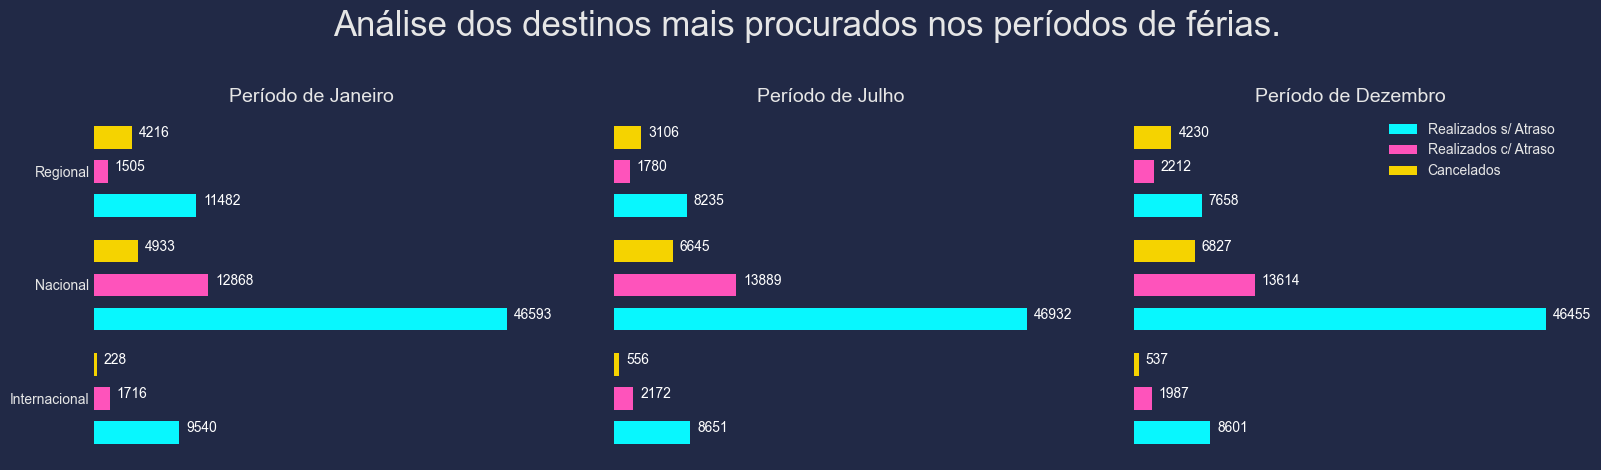

In [22]:
# Plot
Plot.periodo_ferias_geral(
    dataframe=voos_ferias_agg,
    periodo_ferias=AnacVoos.periodo_ferias(),
    grid=False,
    context='cyberpunk',
    figsize=(19, 10),
    suptitle='Análise dos destinos mais procurados nos períodos de férias.'
)

### 3.1.1 Principais destinos nacionais nos períodos de julho, dezembro e janeiro

In [34]:
#DataFrame
linha = AnacVoos.tipo_linha()[2]
periodos = AnacVoos.periodo_ferias()

for periodo in periodos:
    nacionais = AnacVoos.get_voos_ferias_linha_periodo(
        cols_percentuais=[
            ['tx_realizados', 'realizados_s_atraso'],
            ['tx_atrasos', 'realizados_c_atraso'],
            ['tx_cancelados', 'cancelados']],
        cols_groupyby=['codigo_tipo_linha', 'periodo_ferias', 'rota'],
        round=2, linha=linha, periodo=periodo
    ).reset_index()
    
    display(nacionais.reindex(
        columns=['codigo_tipo_linha', 'periodo_ferias', 'rota', 'distancia_media_km', 'voos', 'realizados_s_atraso', 'tx_realizados', 'realizados_c_atraso', 'tx_atrasos', 'cancelados', 'tx_cancelados']))

,codigo_tipo_linha,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,janeiro,SP - RJ,370.842192,2365,1709,0.72,473,0.20,183,0.08
1,Nacional,janeiro,RJ - SP,374.409287,2080,1346,0.65,555,0.27,179,0.09
2,Nacional,janeiro,PR - SP,448.815694,1845,1355,0.73,286,0.16,204,0.11
3,Nacional,janeiro,SP - PR,437.123429,1835,1242,0.68,385,0.21,208,0.11
4,Nacional,janeiro,SP - MG,500.444682,1556,1010,0.65,356,0.23,190,0.12
5,Nacional,janeiro,MG - SP,501.421865,1522,1053,0.69,275,0.18,194,0.13
6,Nacional,janeiro,SP - RS,850.829294,1476,1082,0.73,272,0.18,122,0.08
7,Nacional,janeiro,SP - SP,332.251627,1383,993,0.72,182,0.13,208,0.15
8,Nacional,janeiro,SP - BA,1384.831710,1325,981,0.74,306,0.23,38,0.03
9,Nacional,janeiro,SP - DF,845.108563,1311,850,0.65,323,0.25,138,0.11


,codigo_tipo_linha,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,julho,SP - RJ,370.193500,2462,1691,0.69,411,0.17,360,0.15
1,Nacional,julho,RJ - SP,372.976066,2161,1434,0.66,463,0.21,264,0.12
2,Nacional,julho,PR - SP,457.755739,1883,1278,0.68,432,0.23,173,0.09
3,Nacional,julho,SP - PR,454.903214,1853,1264,0.68,422,0.23,167,0.09
4,Nacional,julho,SP - MG,500.812748,1769,1341,0.76,322,0.18,106,0.06
5,Nacional,julho,MG - SP,500.627518,1693,1167,0.69,406,0.24,120,0.07
6,Nacional,julho,SP - SP,330.947885,1683,1110,0.66,367,0.22,206,0.12
7,Nacional,julho,SP - RS,849.531114,1591,1065,0.67,408,0.26,118,0.07
8,Nacional,julho,SC - SP,484.348625,1432,1005,0.70,316,0.22,111,0.08
9,Nacional,julho,SP - SC,482.062562,1431,971,0.68,332,0.23,128,0.09


,codigo_tipo_linha,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Nacional,dezembro,SP - RJ,370.393558,2270,1464,0.64,502,0.22,304,0.13
1,Nacional,dezembro,RJ - SP,372.521403,2056,1228,0.60,549,0.27,279,0.14
2,Nacional,dezembro,SP - PR,443.294952,1995,1308,0.66,420,0.21,267,0.13
3,Nacional,dezembro,PR - SP,455.943814,1965,1374,0.70,361,0.18,230,0.12
4,Nacional,dezembro,SP - MG,498.951159,1744,1215,0.70,359,0.21,170,0.10
5,Nacional,dezembro,SP - SP,334.140045,1736,1114,0.64,316,0.18,306,0.18
6,Nacional,dezembro,MG - SP,500.228438,1685,1144,0.68,403,0.24,138,0.08
7,Nacional,dezembro,SC - SP,478.536906,1534,1183,0.77,245,0.16,106,0.07
8,Nacional,dezembro,SP - SC,479.100594,1510,1059,0.70,351,0.23,100,0.07
9,Nacional,dezembro,SP - RS,850.880110,1480,1046,0.71,330,0.22,104,0.07


In [ ]:
# Plot
for periodo in AnacVoos.periodo_ferias():
    Plot.periodo_ferias_tipo_linha(
        dataframe=nacionais.query("periodo_ferias == @periodo").nlargest(10, 'voos').reset_index(drop=True),
        periodo_ferias=periodo,
        grid=False,
        context='cyberpunk',
        figsize=(19, 10),
        suptitle=f'10 Principais destinos nacionais no período de {periodo}.'
    )

KeyError: 'rota'

### 3.1.3. Principais destinos internacionais nos períodos de julho, dezembro e janeiro

In [ ]:
# Dataframe
internacionais = AnacVoos.get_voos_ferias_tipo_linha(
    codigo_tipo_linha='Internacional',
    percentuais=[
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'],
        ['tx_cancelados', 'cancelados']],
    round=2
)

for periodo in AnacVoos.periodo_ferias():
    print(
        f"\n\n10 Destinos internacionais mais procurados no período de {periodo}:")
    display(regionais.query("periodo_ferias == @periodo").nlargest(10,
            'voos').reset_index(drop=True))

In [ ]:
# Plot
for periodo in AnacVoos.periodo_ferias():
    Plot.periodo_ferias_tipo_linha(
        dataframe=internacionais.query("periodo_ferias == @periodo").nlargest(10, 'voos').reset_index(drop=True),
        periodo_ferias=periodo,
        grid=False,
        context='cyberpunk',
        figsize=(19, 10),
        suptitle=f'10 Principais destinos internacionais no período de {periodo}.'
    )

## 3.2. Como ficam os aeroportos nesses meses?
Iremos analisar o aumento de atrasos, vôos cancelados, e os principais motivos, o dia mais provável de ter algum problema com o voo.

### 3.2.1. Atrasos

In [ ]:
#Dataframe
atrasos = AnacVoos.get_atrasos_voos_ferias(
                cols_groupby=['periodo_ferias', 'codigo_tipo_linha', 'rota', 'justificativa_atraso'],
                converter_segundos_para_tempo=True,
            )

for periodo in AnacVoos.periodo_ferias():
    print(f"Ranking de justificativas de atraso em {periodo.title()}")
    
    for linha in AnacVoos.tipo_linha():
        display(atrasos.
            query("periodo_ferias == @periodo and codigo_tipo_linha == @linha").
            nlargest(10, 'total_atrasos').reset_index(drop=True)
            )

In [ ]:
#Plot
for periodo in AnacVoos.periodo_ferias():
    print(f"Ranking de justificativas de atraso em {periodo.title()}")

    for linha in AnacVoos.tipo_linha():
        atrasos = AnacVoos.get_atrasos_voos_ferias(
            cols_groupby=['periodo_ferias', 'codigo_tipo_linha', 'justificativa_atraso'],
            converter_segundos_para_tempo=True,
            filtro_periodo_ferias=periodo,
            filtro_codigo_tipo_linha=linha,
        ).query("periodo_ferias == @periodo and codigo_tipo_linha == @linha")
        
        Plot.atrasos_periodo_ferias(
            dataframe=atrasos, 
            periodo=periodo, 
            linha=linha, 
            grid=False, 
            context='cyberpunk', 
            figsize=(15, 10))

### 3.2.2. Cancelamentos

In [ ]:
#Dataframe
cancelamentos = AnacVoos.get_cancelamentos_voos_ferias(
                    cols_groupby=['periodo_ferias', 'codigo_tipo_linha', 'justificativa_cancelamento']
            )

for periodo in AnacVoos.periodo_ferias():
    print(f"Ranking de justificativas de atraso em {periodo.title()}")
    
    for linha in AnacVoos.tipo_linha():
        display(cancelamentos.
            query("periodo_ferias == @periodo and codigo_tipo_linha == @linha").
            nlargest(10, 'total_cancelamentos').reset_index(drop=True)
            )

In [ ]:
#Plot
for periodo in AnacVoos.periodo_ferias():
    print(f"Ranking de justificativas de cancelamento em {periodo.title()}")
    
    for linha in AnacVoos.tipo_linha():
        cancelamentos = AnacVoos.get_cancelamentos_voos_ferias(
            cols_groupby=['periodo_ferias', 'codigo_tipo_linha', 'justificativa_cancelamento']
        ).query("periodo_ferias == @periodo and codigo_tipo_linha == @linha").head(5)
        
        Plot.cancelamentos_periodo_ferias(
            dataframe=cancelamentos, 
            periodo=periodo, 
            linha=linha, 
            grid=False, 
            context='cyberpunk', 
            figsize=(15, 10))

## 3.3. Qual a melhor opção uma viagem nacional ou internacional?
Após as análises da questão 02, vamos analisar se existe algum favorecimento de vôos internacionais sobre os nacionais.

In [ ]:
#Dataframe
resumo: pd.DataFrame = AnacVoos.get_voos_ferias_resumo(
    groupby_columns = ['codigo_tipo_linha', 'periodo_ferias'],
    txs_columns = [
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'],
        ['tx_cancelados', 'cancelados']
    ],
    round=3
)

for linha in AnacVoos.tipo_linha():
    display(resumo.query("codigo_tipo_linha == @linha"))


## 3.4. Qual a melhor rota?
Aqui faremos o DE-PARA entre os  aeroporto origem/destino, para os principais destinos, levantados na pergunta 01.

In [ ]:
# Dataframe Internacional
voos_ferias = AnacVoos.get_voos_ferias()

internacionais = voos_ferias[voos_ferias['codigo_tipo_linha'] == 'Internacional']\
    .groupby(['periodo_ferias', 'aeroporto_destino']).size()\
    .reset_index(name='voos')

nacionais = voos_ferias[voos_ferias['codigo_tipo_linha'] == 'Nacional']\
    .groupby(['periodo_ferias', 'aeroporto_destino']).size()\
    .reset_index(name='voos')

for periodo in AnacVoos.periodo_ferias():
    internacionais_periodo = internacionais.query("periodo_ferias == @periodo")
    nacionais_periodo = nacionais.query("periodo_ferias == @periodo")

    top_internacionais = internacionais_periodo.nlargest(1, 'voos')
    top_nacionais = nacionais_periodo.nlargest(1, 'voos')

    print(f"Comparando os destinos mais procurados no período de {periodo}:")

    if not top_internacionais.empty and not top_nacionais.empty:
        if top_internacionais['voos'].values[0] > top_nacionais['voos'].values[0]:
            print(
                "O destino internacional mais procurado supera o destino nacional mais procurado.")
        elif top_internacionais['voos'].values[0] < top_nacionais['voos'].values[0]:
            print(
                "O destino nacional mais procurado supera o destino internacional mais procurado.")
        else:
            print(
                "O destino internacional e o destino nacional mais procurados têm a mesma quantidade de voos.")

        print("Destino internacional mais procurado:")
        display(top_internacionais.reset_index(drop=True))

        print("Destino nacional mais procurado:")
        display(top_nacionais.reset_index(drop=True))
    elif not top_internacionais.empty:
        print("Não foram encontrados destinos nacionais mais procurados neste período.")

        print("Destino internacional mais procurado:")
        display(top_internacionais.reset_index(drop=True))
    elif not top_nacionais.empty:
        print(
            "Não foram encontrados destinos internacionais mais procurados neste período.")

        print("Destino nacional mais procurado:")
        display(top_nacionais.reset_index(drop=True))
    else:
        print("Não foram encontrados destinos internacionais nem nacionais mais procurados neste período.")

    print()

## 3.5. Qual melhor dia da semana para pegar um vôo?
Iremos cruzar as informações de cancelamentos e atrasados com os dias da semana e verificar qual o dia tem uma menor probabilidade de ter algum problema.

In [ ]:
# Dataframe
atrasos = voos_ferias\
    .query("partida_atrasou == 'N' and chegada_atrasou == 'N' and situacao_voo != 'Cancelado'")\
    .groupby(['codigo_tipo_linha', 'periodo_ferias', 'rota', 'aeroporto_origem', 'aeroporto_destino', 'dia_semana'])\
    .size().reset_index(name='qtd_atraso')\
    .sort_values('qtd_atraso', ascending=False)

for periodo in AnacVoos.periodo_ferias():
    for linha in AnacVoos.tipo_linha():
        print(f"\n\nVoo {linha} em {periodo.title()}:")
        display(atrasos.query("periodo_ferias == @periodo and codigo_tipo_linha == @linha").head(10).reset_index(drop=True))

# Atualizando tempo do processo
AnacVoos.tempo_execucao = (time.time() - AnacVoos.tempo_execucao)

## 4.1. Resumo da base:

In [ ]:
print("Total de arquivos processados:", AnacVoos.total_arquivos)
print("Total de registros processados:", AnacVoos.total_registros)
print("Dados sólidos:", AnacVoos.dados_solidos)
print("Tempo de execução:", Utils.formatar_tempo_execucao(AnacVoos.tempo_execucao))